In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
datapath="DataSet/Heart_Attack_Risk_Levels_Dataset.csv"
df=pd.read_csv(datapath)
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor
3,66,1,70,120,55,270.0,13.87,0.122,positive,High,Immediate medical attention
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate,Monitor closely and consult doctor


In [3]:
df.shape

(1319, 11)

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
Risk_Level                  0
Recommendation              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
 9   Risk_Level                1319 non-null   object 
 10  Recommendation            1319 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 113.5+ KB


In [8]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [9]:
corr=df.corr(numeric_only=True)
corr

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Age,1.000000,-0.093560,-0.023655,0.018231,0.002812,-0.004007,0.017700,0.088557
Gender,-0.093560,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793
Heart rate,-0.023655,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180
Systolic blood pressure,0.018231,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729
Diastolic blood pressure,0.002812,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360
Blood sugar,-0.004007,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069
CK-MB,0.017700,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008
Troponin,0.088557,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000


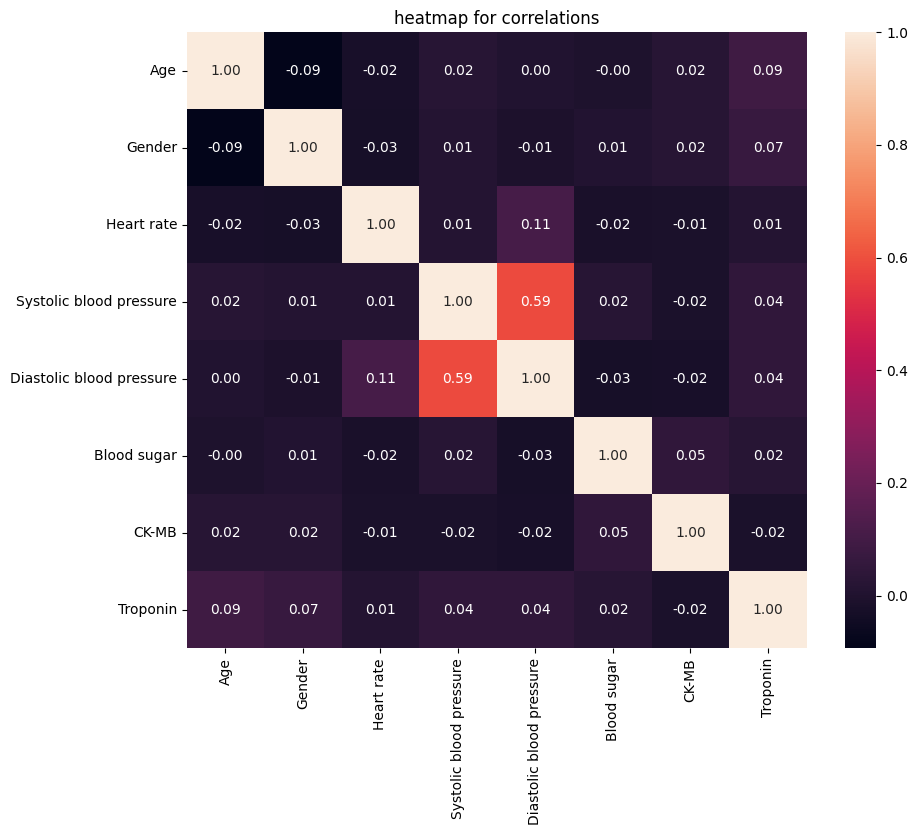

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True,cbar="jet",fmt="0.2f")
plt.title("heatmap for correlations")
plt.show()


In [14]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result', 'Risk_Level', 'Recommendation'],
      dtype='object')

<Axes: ylabel='count'>

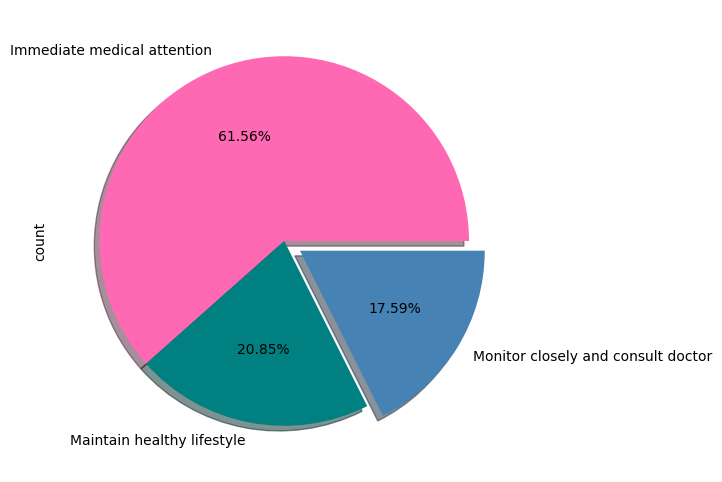

In [19]:
df['Recommendation'].value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0,0,0.1],colors=["hotpink",'teal','steelblue'],figsize=(9,6))


<Axes: ylabel='count'>

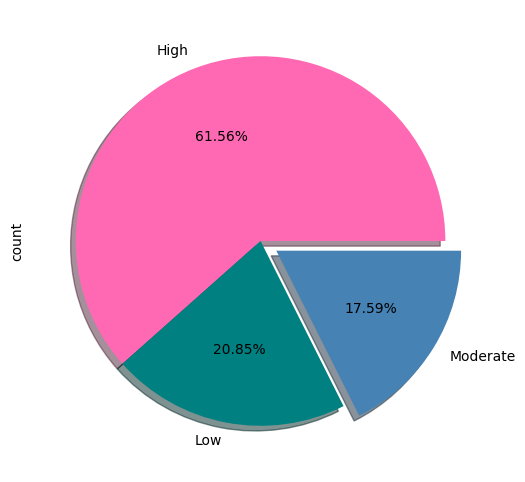

In [21]:
df['Risk_Level'].value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,explode=[0,0,0.1],colors=["hotpink",'teal','steelblue'],figsize=(9,6))

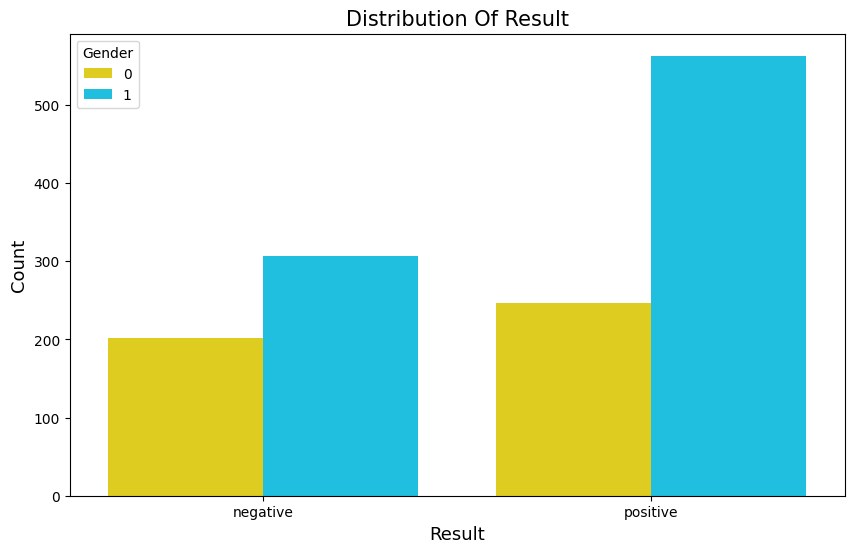

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Result'],palette='jet_r',hue=df['Gender'])
plt.title('Distribution Of Result', fontsize=15)
plt.xlabel('Result', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

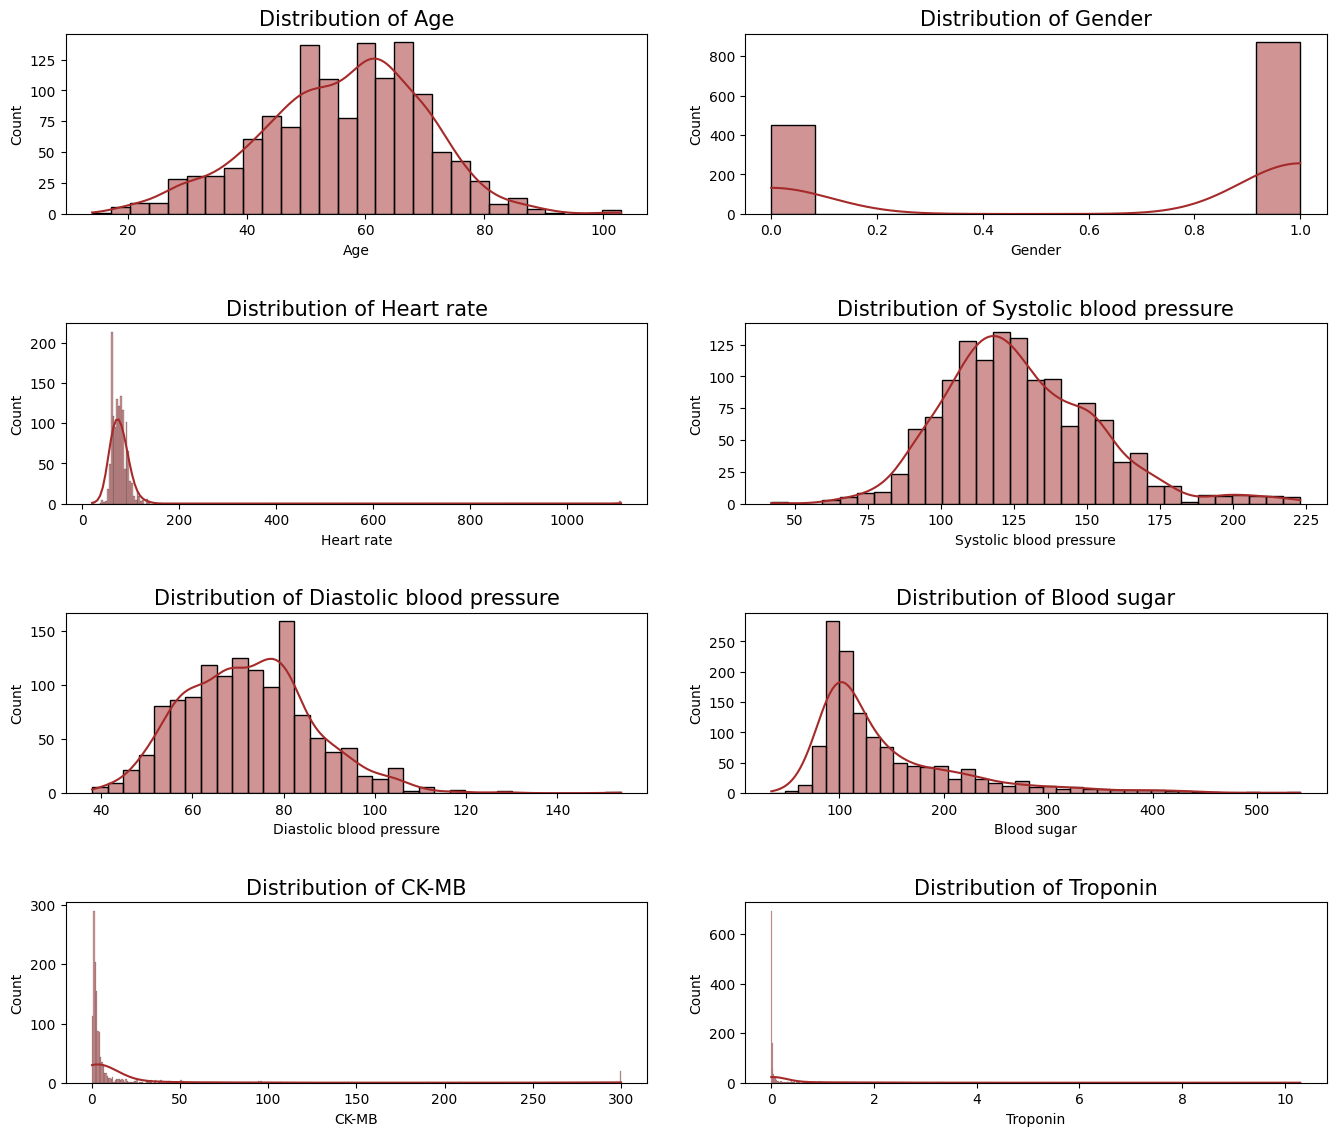

In [32]:
columns = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

plt.figure(figsize=(14,12))
for i,col in enumerate(columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data=df,x=col,kde=True,color='brown')
    plt.title(f'Distribution of {col}', fontsize=15)   
    plt.tight_layout(pad=3.0)

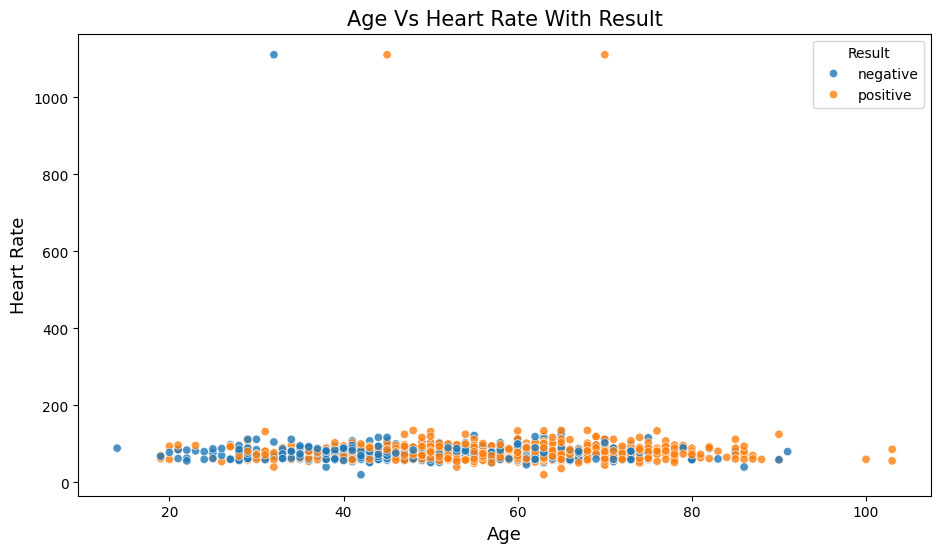

In [39]:
plt.figure(figsize=(11,6))
sns.scatterplot(x=df['Age'],y=df['Heart rate'],hue=df['Result'],alpha=0.8)
plt.title('Age Vs Heart Rate With Result', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Heart Rate', fontsize=13)
plt.show()

<Axes: xlabel='Systolic blood pressure', ylabel='Diastolic blood pressure'>

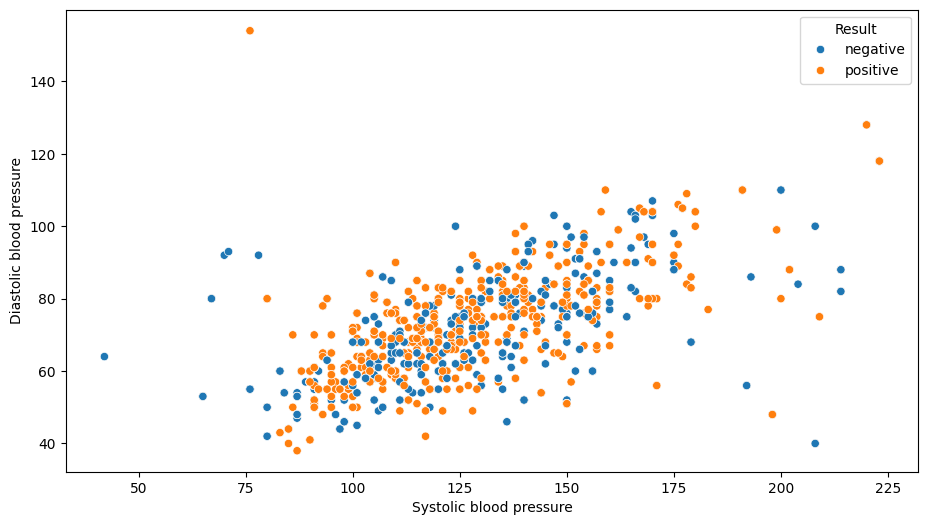

In [41]:
plt.figure(figsize=(11,6))
sns.scatterplot(x=df['Systolic blood pressure'],y=df['Diastolic blood pressure'],hue=df['Result'])

In [43]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score,recall_score


In [44]:
encoder=LabelEncoder()
for c in ["Result","Risk_Level","Recommendation"]:
    df[c]=encoder.fit_transform(df[c])

In [47]:
X=df.drop('Result',axis=1)
Y=df['Result']

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [49]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

⭐Name: Logistic Regression
Accuracy: 1.00
Precision Score: 0.9939024390243902


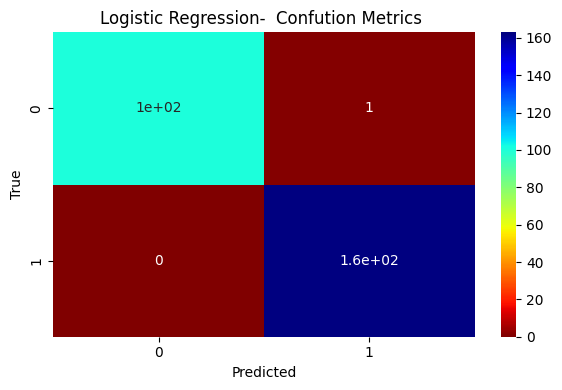

⭐Name: Random Forest Classifier
Accuracy: 1.00
Precision Score: 0.9939024390243902


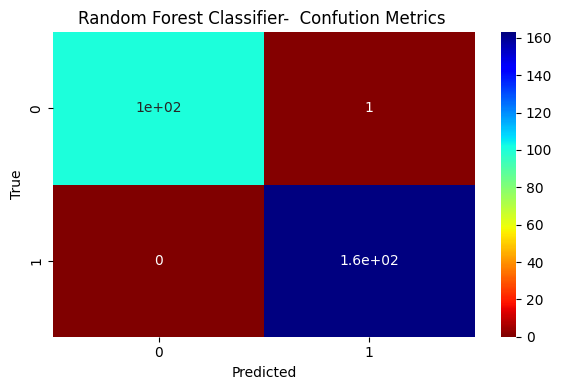

⭐Name: Gradient Boosting Classifier
Accuracy: 1.00
Precision Score: 0.9939024390243902


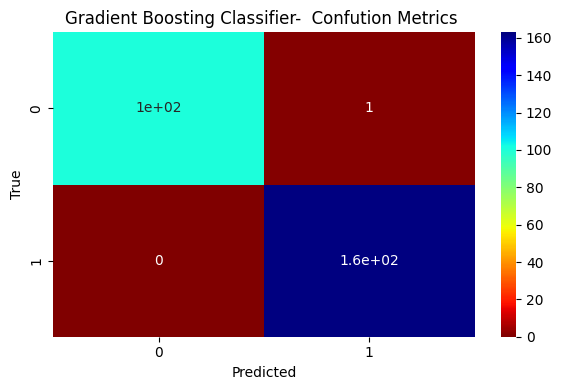

⭐Name: Naive Bayes
Accuracy: 1.00
Precision Score: 0.9939024390243902


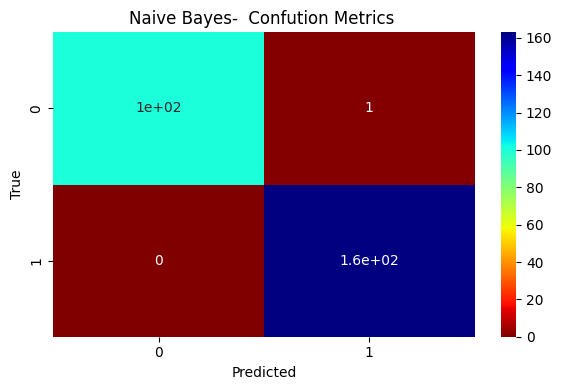

⭐Name: Decision Tree Classifier
Accuracy: 1.00
Precision Score: 0.9939024390243902


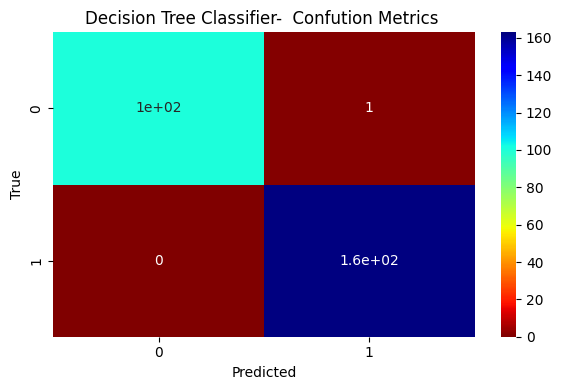


⭐ Summary:


,Model Name,Test Accuracy,Test Precision,Test Recall Score,Test F1 Score
0,Logistic Regression,0.996212,0.993902,0.99505,0.995983
1,Random Forest Classifier,0.996212,0.993902,0.99505,0.995983
2,Gradient Boosting Classifier,0.996212,0.993902,0.99505,0.995983
3,Naive Bayes,0.996212,0.993902,0.99505,0.995983
4,Decision Tree Classifier,0.996212,0.993902,0.99505,0.995983


In [55]:
summary=[]
for names,model in models.items():
    model.fit(X_train,Y_train)
    preds=model.predict(X_test)
    accuracy=accuracy_score(Y_test,preds)
    p=precision_score(Y_test,preds)
    r=recall_score(Y_test,preds,average="macro")
    f=f1_score(Y_test,preds,average="macro")

    print("="*50)
    print(f"⭐Name: {names}")
    print(f"Accuracy: {accuracy:.2f}")   
    print(f"Precision Score: {p}")

    plt.figure(figsize=(6,4))
    cm=confusion_matrix(Y_test,preds)
    sns.heatmap(cm,annot=True,cmap='jet_r')
    plt.title(f"{names}-  Confution Metrics ")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    print("="*50)


    summary.append({
        'Model Name': names,
        'Test Accuracy': accuracy,
        'Test Precision': p,
        'Test Recall Score': r,
        'Test F1 Score': f
        
    })

    summary_df=pd.DataFrame(summary)


print("\n⭐ Summary:")
summary_df
    

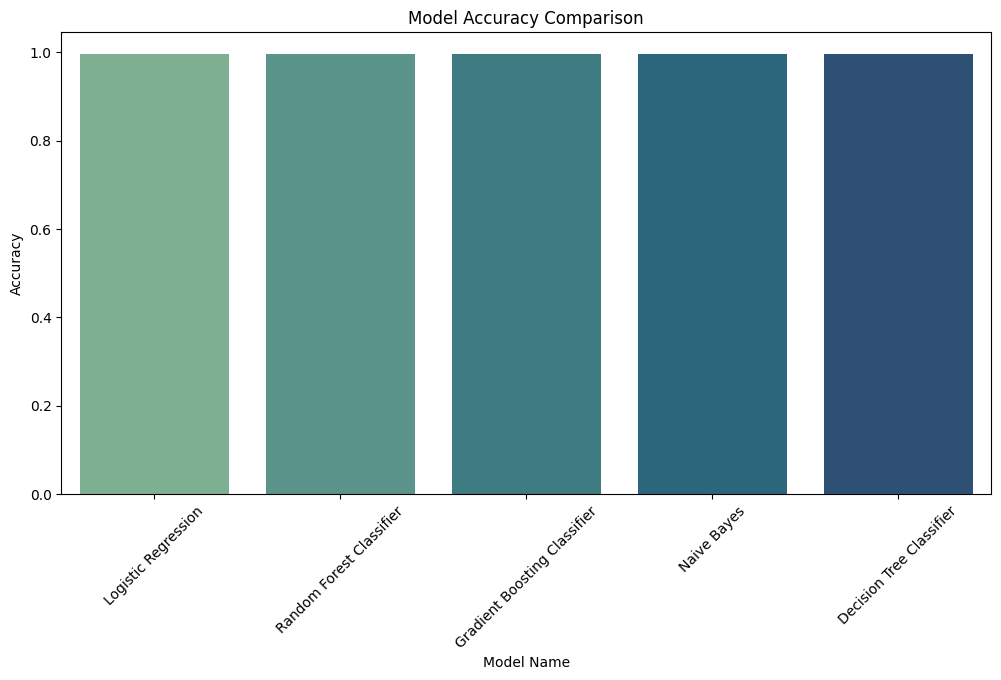

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='Model Name', y='Test Accuracy', palette='crest')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()